In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
tool_results = {
    'Pillow': {
        'crop': [2.671, 2.679, 2.669, 2.671, 2.676],
        'compress': [4.700, 4.745, 4.739, 4.776, 4.746],
        'resize': [4.853, 4.863, 4.838, 4.889, 4.842],
        'convert': [33.092, 33.176, 33.531, 33.411, 33.960],
    },
    'OpenCV': {
        'crop': [2.041, 2.072, 2.065, 2.066, 2.057],
        'compress': [2.712, 2.724, 2.287, 2.297, 2.317],
        'resize': [42.288, 2.287, 2.287, 2.297, 2.317],
        'convert': [134.731, 136.419, 135.692, 136.200, 135.931],
    },
    'Libvips': {
        'crop': [2.10, 2.12, 2.10, 2.12, 2.12],
        'compress': [4.91, 4.94, 4.94, 4.95, 4.94],
        'resize': [3.10, 3.09, 3.10, 3.13, 3.13],
        'convert': [23.89, 23.79, 23.88, 23.56, 23.88]
    },
    'ImageMagick': {
        'crop': [2.37, 2.36, 2.38, 2.39, 2.39],
        'compress': [4.59, 4.57, 4.57, 4.59, 4.58],
        'resize': [11.55, 11.58, 11.56, 11.59, 11.55],
        'convert': [24.13, 24.17, 24.89, 24.76, 24.45]
    },
    'GraphicsMagick': {
        'crop': [2.34, 2.34, 2.35, 2.34, 2.35],
        'compress': [4.82, 4.82, 4.78, 4.80, 4.81],
        'resize': [5.38, 5.40, 5.40, 5.41, 5.41],
        'convert': [23.78, 24.30, 23.98, 24.21, 24.32]
    },
    'FFmpeg ': {
        'crop': [1.59, 1.59, 1.59, 1.59, 1.60],
        'compress': [2.97, 2.96, 3.00, 3.01, 2.99],
        'resize': [2.26, 2.28, 2.31, 2.30, 2.30],
        'convert': [23.73, 23.49, 23.52, 23.64, 23.75]
    }
}

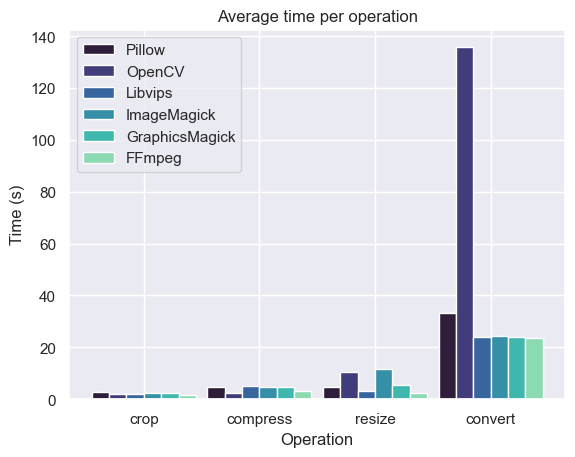

In [53]:
# create a beautiful plot visualizing the results
fig, ax = plt.subplots()
bar_width = 0.15
index = range(4)

# use a style that is more visually appealing
sns.set()

# Define a color gradient for the bar charts
colors = sns.color_palette('mako', len(tool_results))

for i, (tool, results) in enumerate(tool_results.items()):
    ax.bar([x + i * bar_width for x in index], [sum(results[key]) / len(results[key]) for key in results], bar_width, label=tool, color=colors[i])

ax.set_xlabel('Operation')
ax.set_ylabel('Time (s)')
ax.set_title('Average time per operation')
ax.set_xticks([x + bar_width * (len(tool_results) - 1) / 2 for x in index])  # Center the operation labels
ax.set_xticklabels(['crop', 'compress', 'resize', 'convert'])
ax.legend()

plt.show()